In [1]:
import pandas as pd
import geopandas

In [2]:
file_path = 'Datasets/Population_VNM_2020_1km_Aggregated_UNadj.csv'
pop = pd.read_csv(file_path)

In [3]:
pop = geopandas.GeoDataFrame(
    pop, geometry=geopandas.points_from_xy(pop.X, pop.Y))

In [4]:
pop.rename(columns={'X':'x','Y':'y'},inplace=True)

In [5]:
vietnamBoundaries = geopandas.read_file('Datasets/Vietnam_Administrative_Boundaries.geojson')

In [6]:
hospitals = geopandas.read_file('20210930_hospitalsNodesMerge4.shp')

In [7]:
hospitals

,full_id,osm_id,osm_type,amenity,building,name,type,addr_city,addr_distr,addr_house,...,index_righ,FID_Raster,Id,gridcode,FID_countr,country,SUM_Shape_,Shape_Leng,Shape_Area,geometry
0,w118673887,118673887,way,hospital,None,B???nh vi???n Qu??n y C17,None,None,None,None,...,448.0,57105.0,57105.0,4.0,1.0,1.0,27.979371,0.338743,0.006571,POINT (108.20728 16.05423)
1,w136271003,136271003,way,hospital,yes,B???nh vi???n Th??? thao Vi???t Nam,None,None,None,None,...,290.0,53718.0,53718.0,4.0,1.0,1.0,27.979371,12.329664,0.762207,POINT (105.76152 21.02313)
2,w237134527,237134527,way,hospital,None,C???c H???u C???n Qu??n Khu 3 - B???nh Vi???n 5,None,None,None,None,...,274.0,53525.0,53525.0,4.0,1.0,1.0,27.979371,0.500000,0.013889,POINT (105.96898 20.25092)
3,w242483921,242483921,way,hospital,None,B???nh vi???n V??n Giang,None,None,None,None,...,290.0,53718.0,53718.0,4.0,1.0,1.0,27.979371,12.329664,0.762207,POINT (105.94418 20.95112)
4,w264451933,264451933,way,hospital,no,B???nh vi???n Y H???c C??? Truy???n T???nh B??...,None,None,None,2,...,745.0,62789.0,62789.0,4.0,1.0,1.0,27.979371,0.666667,0.020833,POINT (106.65781 10.98089)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,n7541325568,7541325568,node,hospital,None,Thien Nhan Hospital,None,None,None,None,...,448.0,57105.0,57105.0,4.0,1.0,1.0,27.979371,0.338743,0.006571,POINT (108.21586 16.07660)
105,n7668156135,7668156135,node,hospital,None,Phòng Khám ?a Khoa B?o An,None,None,None,None,...,241.0,53109.0,53109.0,3.0,1.0,1.0,27.979371,2.138612,0.113160,POINT (106.53908 21.00066)
106,n7746903954,7746903954,node,hospital,None,Phòng khám ?a Khoa Ái Ngh?a Th?nh Phú,None,None,None,None,...,748.0,62869.0,62869.0,4.0,1.0,1.0,27.979371,1.500000,0.062500,POINT (106.83832 11.01127)
107,n8166987975,8166987975,node,hospital,None,Huong Dat Dental Clinic,None,None,None,None,...,448.0,57105.0,57105.0,4.0,1.0,1.0,27.979371,0.338743,0.006571,POINT (108.18375 16.06916)


In [8]:
hospitals["x"] = hospitals.centroid.x
hospitals["y"] = hospitals.centroid.y

<ipython-input-8-0d4241c28bf7>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  hospitals["x"] = hospitals.centroid.x
<ipython-input-8-0d4241c28bf7>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  hospitals["y"] = hospitals.centroid.y


In [9]:
import osmnx as ox
import networkx as nx
import pandana
import numpy as np

In [10]:
#from pyrosm import OSM, get_data

In [11]:
ox.config(use_cache=True, log_console=True)

In [12]:
#network = ox.graph_from_xml('Datasets/highways2.osm')

In [14]:
network = ox.load_graphml('Datasets/20211003_graph01234.graphml')

In [15]:
#file_path = 'Datasets/20210928networkGraph.graphml'
#ox.save_graphml(G, filepath=file_path)

In [16]:
from sklearn.neighbors import BallTree
import numpy as np
import mapclassify as mc
import matplotlib.pyplot as plt
import time

def get_igraph_nodes(G):
    """Retrieves a frame from nodes of the igaph"""
    attributes = G.vs.attribute_names()
    if len(attributes) == 0:
        raise ValueError("Nodes does not have data.")
    data = {name: G.vs[name] for name in attributes}
    if "geometry" in attributes:
        return gpd.GeoDataFrame(data, 
                                geometry="geometry", 
                                crs="epsg:4326")
    return pd.DataFrame(data)

def get_nearest(src_points, candidates, k_neighbors=1):
    """Find nearest neighbors for all source points from a set of candidate points"""
    tree = BallTree(candidates, leaf_size=15, metric='haversine')
    distances, indices = tree.query(src_points, k=k_neighbors)
    distances = distances.transpose()
    indices = indices.transpose()
    closest = indices[0]
    closest_dist = distances[0]
    return (closest, closest_dist)

def nearest_neighbor(left_gdf, right_gdf, return_dist=False):
    """
    For each point in left_gdf, find closest point in right GeoDataFrame and return them.
    
    For further info, take a look this lesson: 
        https://autogis-site.readthedocs.io/en/latest/notebooks/L3/06_nearest-neighbor-faster.html
    """
    left_geom_col = left_gdf.geometry.name
    right_geom_col = right_gdf.geometry.name
    right = right_gdf.copy().reset_index(drop=True)
    left_radians = np.array(left_gdf[left_geom_col].apply(lambda geom: 
                                                          (geom.x * np.pi / 180, geom.y * np.pi / 180)
                                                         ).to_list())
    right_radians = np.array(right[right_geom_col].apply(lambda geom: 
                                                         (geom.x * np.pi / 180, geom.y * np.pi / 180)
                                                        ).to_list())
    closest, dist = get_nearest(src_points=left_radians, candidates=right_radians)
    closest_points = right.loc[closest]
    closest_points = closest_points.reset_index(drop=True)
    if return_dist:
        earth_radius = 6371000  # meters
        closest_points['distance'] = dist * earth_radius
    return closest_points

def find_nearest_nodeids(nodes, src_gdf):
    """Finds the nearest node-ids for all points in 'src_gdf'."""
    nearest = nearest_neighbor(src_gdf, nodes, return_dist=True)
    return list(set(nearest["node_id"].values)), nearest["distance"].values

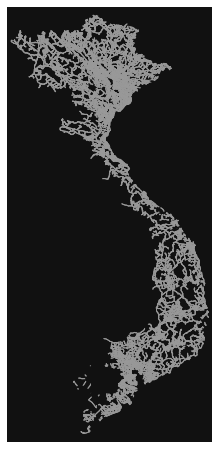

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [17]:
ox.plot_graph(network,node_size=0)

In [18]:
nodes = ox.graph_to_gdfs(network,nodes=True,edges=False)

In [19]:
edges = ox.graph_to_gdfs(network,nodes=False,edges=True)

In [20]:
# Create graph
G = network

In [21]:
edges.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 83273 entries, (81962210, 5721840331, 0) to (9109918399, 5961751638, 0)
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   osmid        83273 non-null  object  
 1   highway      83273 non-null  object  
 2   oneway       83273 non-null  bool    
 3   length       83273 non-null  float64 
 4   geometry     83273 non-null  geometry
 5   ref          24364 non-null  object  
 6   index_right  60983 non-null  object  
 7   FID_Raster   60983 non-null  object  
 8   Id           60983 non-null  object  
 9   gridcode     83273 non-null  object  
 10  FID_countr   60983 non-null  object  
 11  country      60983 non-null  object  
 12  SUM_Shape_   60983 non-null  object  
 13  Shape_Leng   60983 non-null  object  
 14  Shape_Area   60983 non-null  object  
 15  lanes        5529 non-null   object  
 16  name         35869 non-null  object  
 17  bridge       14

In [22]:
src_ids, euclidean_distance = ox.distance.nearest_nodes(G=network,X=hospitals['x'], Y=hospitals['y'],return_dist=True)

In [23]:
src_idsPop, euclidean_distancePop = ox.distance.nearest_nodes(G=network,X=pop['x'], Y=pop['y'],return_dist=True)

In [24]:
import igraph

In [25]:
src_cnt = len(src_ids)

In [26]:
nodes

,y,x,index_right,FID_Raster,Id,gridcode,FID_countr,country,SUM_Shape_,Shape_Leng,Shape_Area,highway,ref,geometry
osmid,,,,,,,,,,,,,,
75617751,21.025441,105.853216,230.0,53024.0,53024.0,5,1.0,1.0,27.9793709915,0.951570677355,0.0340763301485,NaN,NaN,POINT (105.85322 21.02544)
75618029,21.024871,105.855136,230.0,53024.0,53024.0,5,1.0,1.0,27.9793709915,0.951570677355,0.0340763301485,NaN,NaN,POINT (105.85514 21.02487)
6644523689,21.025951,105.851667,230.0,53024.0,53024.0,5,1.0,1.0,27.9793709915,0.951570677355,0.0340763301485,NaN,NaN,POINT (105.85167 21.02595)
1748253601,21.031894,105.851772,230.0,53024.0,53024.0,5,1.0,1.0,27.9793709915,0.951570677355,0.0340763301485,NaN,NaN,POINT (105.85177 21.03189)
993037757,21.024378,105.856964,230.0,53024.0,53024.0,5,1.0,1.0,27.9793709915,0.951570677355,0.0340763301485,NaN,NaN,POINT (105.85696 21.02438)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5961712145,17.929520,106.502736,378.0,55490.0,55490.0,2,1.0,1.0,27.9793709915,0.152850588735,0.000356803983571,NaN,NaN,POINT (106.50274 17.92952)
9109918393,17.932085,106.497181,377.0,55489.0,55489.0,3,1.0,1.0,27.9793709915,0.319319892587,0.00626052081809,NaN,NaN,POINT (106.49718 17.93208)
9109918325,17.932113,106.497145,377.0,55489.0,55489.0,3,1.0,1.0,27.9793709915,0.319319892587,0.00626052081809,NaN,NaN,POINT (106.49715 17.93211)


In [27]:
# Calculate distance to the closest hospital
nodes["distance_to_closest"] = nodes.iloc[:, -src_cnt:].min(axis=1)

# At this point you could already see the catchment areas from each road network node 
# to the closest hospital.
# Comment out the following if you want to see:
# ax = nodes.plot(column="distance_to_closest", cmap="RdYlBu", markersize=0.5)

<ipython-input-27-89a1e2adfa50>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  nodes["distance_to_closest"] = nodes.iloc[:, -src_cnt:].min(axis=1)


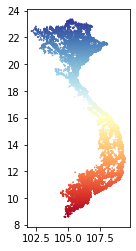

In [28]:
ax = nodes.plot(column="distance_to_closest", cmap="RdYlBu", markersize=0.5)

In [29]:
hospitals['node_id'] = 0

In [30]:
nodes["node_id"] = nodes.index

In [31]:
closest = nearest_neighbor(pop,nodes,return_dist=True)

In [32]:
closest

,y,x,index_right,FID_Raster,Id,gridcode,FID_countr,country,SUM_Shape_,Shape_Leng,Shape_Area,highway,ref,geometry,distance_to_closest,node_id,distance
0,23.361695,105.318230,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (105.31823 23.36169),23.361695,2522145872,1001.992361
1,23.310491,105.296753,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (105.29675 23.31049),23.310491,7968676755,2259.617990
2,23.361695,105.318230,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (105.31823 23.36169),23.361695,2522145872,1858.869236
3,23.361695,105.318230,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (105.31823 23.36169),23.361695,2522145872,1076.340540
4,23.361695,105.318230,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (105.31823 23.36169),23.361695,2522145872,760.847273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406779,8.851441,104.938055,837.0,64752.0,64752.0,5,1.0,1.0,27.9793709915,2.47097623538,0.151349817713,NaN,NaN,POINT (104.93805 8.85144),8.851441,4889231212,9384.317624
406780,8.600705,104.809473,845.0,65021.0,65021.0,2,1.0,1.0,27.9793709915,0.326033275684,0.0057658605627,NaN,NaN,POINT (104.80947 8.60070),8.600705,4889180335,2326.418657
406781,8.600705,104.809473,845.0,65021.0,65021.0,2,1.0,1.0,27.9793709915,0.326033275684,0.0057658605627,NaN,NaN,POINT (104.80947 8.60070),8.600705,4889180335,3173.669261
406782,8.600705,104.809473,845.0,65021.0,65021.0,2,1.0,1.0,27.9793709915,0.326033275684,0.0057658605627,NaN,NaN,POINT (104.80947 8.60070),8.600705,4889180335,4055.785359


In [33]:
#closest['node_id'] = closest.index

In [34]:
pop["node_id"] = closest["node_id"]
pop["distance_to_closest_node"] = closest["distance"]

In [35]:
pop

,x,y,Z,geometry,node_id,distance_to_closest_node
0,105.319583,23.395417,56.801758,POINT (105.31958 23.39542),2522145872,1001.992361
1,105.294583,23.387083,69.821190,POINT (105.29458 23.38708),7968676755,2259.617990
2,105.302916,23.387083,61.812702,POINT (105.30292 23.38708),2522145872,1858.869236
3,105.311250,23.387083,50.627831,POINT (105.31125 23.38708),2522145872,1076.340540
4,105.319583,23.387083,87.299217,POINT (105.31958 23.38708),2522145872,760.847273
...,...,...,...,...,...,...
406779,104.894583,8.570417,17.621071,POINT (104.89458 8.57042),4889231212,9384.317624
406780,104.827916,8.562083,16.502373,POINT (104.82792 8.56208),4889180335,2326.418657
406781,104.836250,8.562083,31.207506,POINT (104.83625 8.56208),4889180335,3173.669261
406782,104.844583,8.562083,29.299860,POINT (104.84458 8.56208),4889180335,4055.785359


In [36]:
access = pop.merge(nodes[["distance_to_closest", "node_id"]], on="node_id")

In [37]:
# Add the (Euclidean) distance between building 
# and the closest node in the road network to get a full "door-to-door" distance
access["distance"] = access["distance_to_closest"] + access["distance_to_closest_node"]

# Calculate distance in kilometers (meters by default)
access["distance_km"] = (access["distance"] / 1000).round(1)

In [38]:
access.head(2)

,x,y,Z,geometry,node_id,distance_to_closest_node,distance_to_closest,distance,distance_km
0,105.319583,23.395417,56.801758,POINT (105.31958 23.39542),2522145872,1001.992361,23.361695,1025.354055,1.0
1,105.302916,23.387083,61.812702,POINT (105.30292 23.38708),2522145872,1858.869236,23.361695,1882.230931,1.9


In [39]:
# Classify distances to every 2 km zones, specify that the upper boundary is 50 kilometer
# everything above this will be put into a same class
upper_boundary_distance = 10
width = 1

# Use self-defined classification
classifier = mc.UserDefined(access["distance_km"], bins=[x for x in range(0, int(upper_boundary_distance)+1, width)])
access["cls"] = access[["distance_km"]].apply(classifier)
# Replace the class numbers to distance categories (e.g. 0-2, 2-4 .. km etc.)
access["travel_distance"] = access["cls"].replace({k: v 
                                                   for k, v in 
                                                   zip([x for x in range(len(classifier.bins))], 
                                                       classifier.bins)})

# Set all values over 50 km as 51 (to improve how the colorscale works)
access.loc[access["travel_distance"] > upper_boundary_distance, "travel_distance"] = upper_boundary_distance + 1

# Convert the observation counts as percentages
classifier.counts = (classifier.counts / classifier.counts.sum()).round(3)

# Convert stats to dataframe
bins = classifier.bins.astype(int)
categories = np.vstack([bins[:-1], bins[1:]]).T
categories = [f"{low}-{high}" for low, high in categories]
access_zone_classes = pd.DataFrame({"Distance": categories, "% of pop nodes": classifier.counts[1:]})

In [40]:
access['Zpct'] = (access.Z / access.Z.sum())*100

In [41]:
# percentage of people living further away than 2km
access[access['distance_km'] <= 1]['Zpct'].sum()

73.0211930778096

In [42]:
access[access['cls']==10]

,x,y,Z,geometry,node_id,distance_to_closest_node,distance_to_closest,distance,distance_km,cls,travel_distance,Zpct
54884,102.686250,21.712083,22.845865,POINT (102.68625 21.71208),8251039852,9070.641067,22.045817,9092.686884,9.1,10,10.0,0.000023
54887,102.686250,21.703750,21.549856,POINT (102.68625 21.70375),8251039852,9253.400929,22.045817,9275.446745,9.3,10,10.0,0.000022
54889,102.677916,21.695417,18.094612,POINT (102.67792 21.69542),8251039852,9079.922128,22.045817,9101.967944,9.1,10,10.0,0.000019
54890,102.686250,21.695417,20.977667,POINT (102.68625 21.69542),8251039852,9436.997307,22.045817,9459.043124,9.5,10,10.0,0.000022
54892,102.677916,21.687083,22.837444,POINT (102.67792 21.68708),8251039852,9271.288727,22.045817,9293.334543,9.3,10,10.0,0.000023
...,...,...,...,...,...,...,...,...,...,...,...,...
392839,104.927916,9.687083,123.142799,POINT (104.92792 9.68708),7937101066,9103.424182,9.409308,9112.833490,9.1,10,10.0,0.000127
392840,104.919583,9.678750,120.374771,POINT (104.91958 9.67875),7937101066,9386.682951,9.409308,9396.092259,9.4,10,10.0,0.000124
392843,104.919583,9.670417,113.156837,POINT (104.91958 9.67042),7937101066,9191.017568,9.409308,9200.426876,9.2,10,10.0,0.000116
406033,104.894583,8.578750,61.723495,POINT (104.89458 8.57875),4889231212,9180.697406,8.851441,9189.548846,9.2,10,10.0,0.000063


In [43]:
round(access.groupby('cls')['Zpct'].sum(),1)

cls
0      2.0
1     71.1
2     16.6
3      5.4
4      2.4
5      1.2
6      0.6
7      0.3
8      0.1
9      0.1
10     0.0
11     0.2
Name: Zpct, dtype: float64

In [44]:
access_zone_classes

,Distance,% of pop nodes
0,0-1,0.304
1,1-2,0.272
2,2-3,0.170
3,3-4,0.104
4,4-5,0.064
5,5-6,0.039
6,6-7,0.021
7,7-8,0.010
8,8-9,0.005
9,9-10,0.003


In [45]:
pd.DataFrame(access.groupby('cls')['Zpct'].sum()).reset_index().merge(access_zone_classes['Distance'],left_index=True,right_index=True)

,cls,Zpct,Distance
0,0,1.962637,0-1
1,1,71.058556,1-2
2,2,16.583313,2-3
3,3,5.358955,3-4
4,4,2.381987,4-5
5,5,1.215459,5-6
6,6,0.644884,6-7
7,7,0.328281,7-8
8,8,0.147811,8-9
9,9,0.067113,9-10


In [46]:
# Say, "the default sans-serif font is COMIC SANS"
plt.rcParams['font.sans-serif'] = "Helvetica"
# Then, "ALWAYS use sans-serif fonts"
plt.rcParams['font.family'] = "sans-serif"

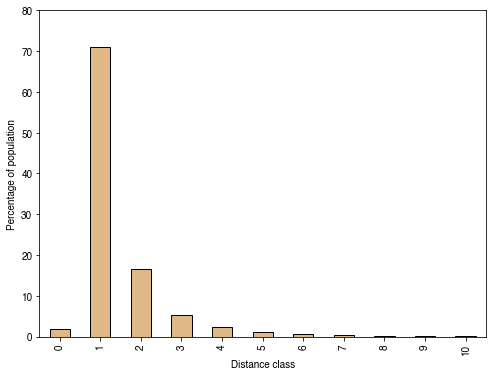

In [47]:
fig, ax = plt.subplots(figsize=(8,6))
pd.DataFrame(access.groupby('cls')['Zpct'].sum()).reset_index().merge(access_zone_classes['Distance'],left_index=True,right_index=True)['Zpct'].plot(x='cls',kind='bar',color='burlywood',ax=ax,edgecolor='black')
plt.xlabel("Distance class")
plt.ylabel("Percentage of population")
ax.set_ylim([0,80])
plt.savefig('20211003_PeopleRangeScenario01234.svg',format='svg')
plt.savefig('20211003_PeopleRangeScenario01234.eps',format='eps')

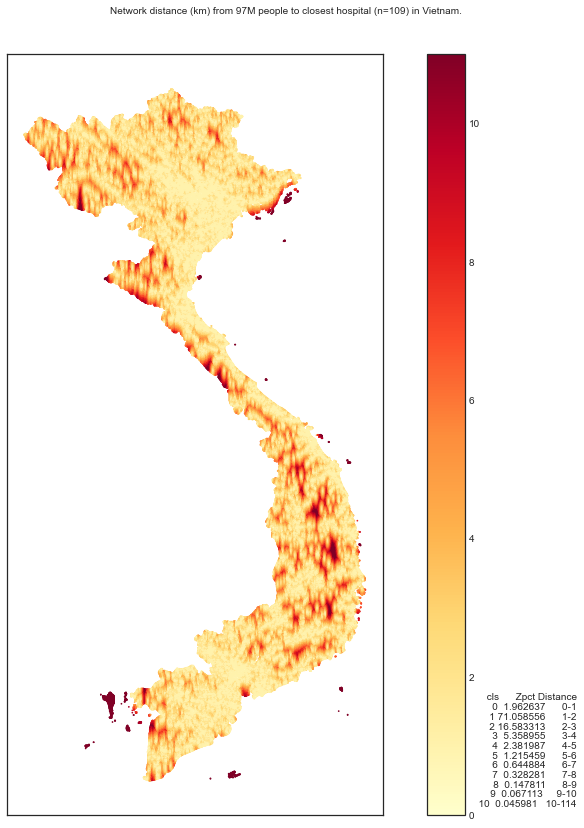

In [48]:
plt.style.use('seaborn-white')

fig, ax = plt.subplots(figsize=(16,14))
access.plot(ax=ax,column="travel_distance", markersize=0.5, legend=True, cmap="YlOrRd", figsize=(17,10))

ax.tick_params(
    axis='both', bottom=False, left=False,         
    labelbottom=False, labelleft=False) 

# Adjust the map extent
#ax.set_xlim(22.5, 30.5)
#ax.set_ylim(57.4, 59.9)
# Add some useful info
ax.text(x=104, y=25, s=f"Network distance (km) from {round(pop['Z'].sum()/1000000)}M people to closest hospital (n={src_cnt}) in Vietnam.")
ax.text(x=114,y=8, s=pd.DataFrame(access.groupby('cls')['Zpct'].sum()).reset_index().merge(access_zone_classes['Distance'],left_index=True,right_index=True).to_string(index=False),
        ha='right', linespacing=1.1);

plt.savefig('20211003_NetworkDistanceScenarioScenario01234.svg',format='svg')
plt.savefig('20211003_NetworkDistanceScenarioScenario01234.eps',format='eps')

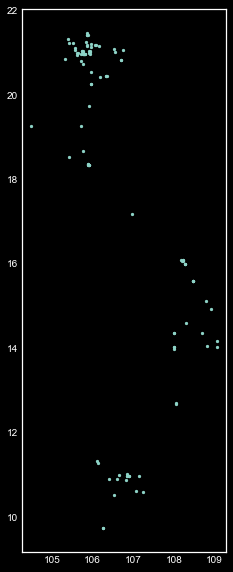

In [49]:
plt.style.use('dark_background')
ax = hospitals.plot(markersize=5, figsize=(17,10))

<AxesSubplot:>

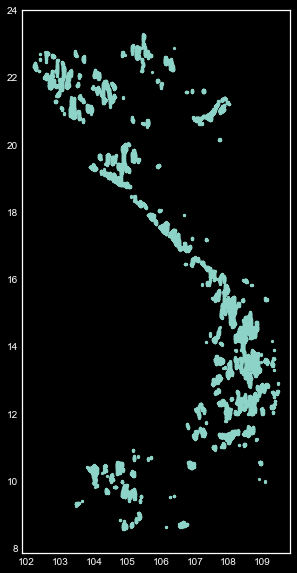

In [50]:
access[access['distance_km'] > 5].plot(markersize=5, figsize=(17,10))

In [51]:
#access['distance'].plot(kind='bar')